In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [208]:
path = r"C:\Users\Hi\Downloads\movie_data"
count = 0
for i in os.listdir(path):
    if i.endswith('.csv'):
        count +=1
count

4

In [169]:
movies=pd.read_csv(r"C:\Users\Hi\Downloads\movie_data\movies.csv")

In [170]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


# What is the shape of "movies.csv"

In [171]:
movies.shape

(9742, 3)

# What is the shape of "ratings.csv"

In [172]:
ratings=pd.read_csv(r"C:\Users\Hi\Downloads\movie_data\ratings.csv")

In [173]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [174]:
ratings.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"

In [175]:
ratings["userId"].unique().shape

(610,)

In [176]:
df=pd.merge(movies,ratings,left_on='movieId', right_on='movieId')
df.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


# Which movie has recieved maximum number of user ratings

In [177]:
a= df.groupby('title')['rating'].sum()
maxratemovie= a.idxmax()
maxratemovie

'Shawshank Redemption, The (1994)'

In [178]:
tags=pd.read_csv(r"C:\Users\Hi\Downloads\movie_data\tags.csv")
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [179]:
df1=pd.merge(df,tags,left_on='movieId', right_on='movieId',how="right")
df1.head(5)

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,60756,Step Brothers (2008),Comedy,2.0,5.0,1.445715e+09,2,funny,1445714994
1,60756,Step Brothers (2008),Comedy,18.0,3.0,1.455749e+09,2,funny,1445714994
2,60756,Step Brothers (2008),Comedy,62.0,3.5,1.528934e+09,2,funny,1445714994
3,60756,Step Brothers (2008),Comedy,68.0,2.5,1.269123e+09,2,funny,1445714994
4,60756,Step Brothers (2008),Comedy,73.0,4.5,1.464196e+09,2,funny,1445714994


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?


In [180]:
matrixtags=df1[df1['title'] == 'Matrix, The (1999)']['tag']
matrixtags.unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

# What is the average user rating for movie named "Terminator 2: Judgment Day (1991) 

In [181]:
termirating=df1[df1['title']=='Terminator 2: Judgment Day (1991)']['rating'].mean()
termirating

3.970982142857143

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

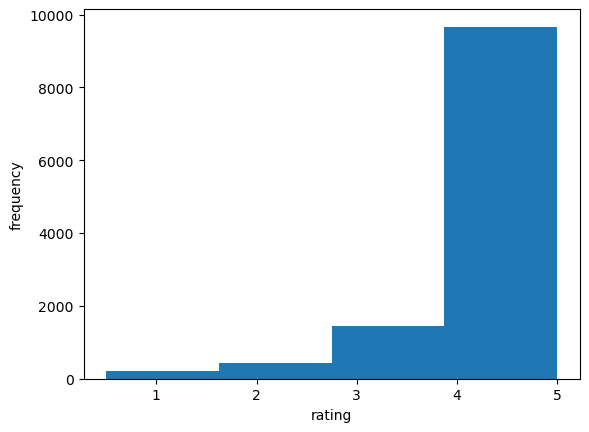

In [182]:
a=df1[df1['title']=='Fight Club (1999)']['rating']
plt.hist(a, bins=4)
plt.xlabel("rating")
plt.ylabel("frequency")
plt.show()

In [183]:
aggrating = df1.groupby('movieId')['rating'].agg(['count', 'mean'])


In [184]:
aggrating

,count,mean
movieId,,
1,645,3.920930
2,440,3.431818
3,104,3.259615
5,98,3.071429
7,54,3.185185
...,...,...
183611,3,4.000000
184471,12,2.500000
187593,36,3.875000


In [185]:
df2=pd.merge(movies,aggrating,left_on="movieId",right_on="movieId",how="inner")
df2

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429
4,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
1567,183611,Game Night (2018),Action|Comedy|Crime|Horror,3,4.000000
1568,184471,Tomb Raider (2018),Action|Adventure|Fantasy,12,2.500000
1569,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,36,3.875000
1570,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,10,3.900000


In [186]:
df2=df2[df2['count'] > 50]
df2

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429
4,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
1543,148626,"Big Short, The (2015)",Drama,78,3.961538
1554,164179,Arrival (2016),Sci-Fi,182,3.980769
1557,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,56,4.142857
1558,168252,Logan (2017),Action|Sci-Fi,125,4.280000


# Which movie is the most popular based on  average user ratings

In [187]:
movies_=df2.sort_values(by='mean', ascending=False)
movies_.head(1)

,movieId,title,genres,count,mean
83,318,"Shawshank Redemption, The (1994)",Crime|Drama,1268,4.429022


In [188]:
movies_.head(10)

,movieId,title,genres,count,mean
83,318,"Shawshank Redemption, The (1994)",Crime|Drama,1268,4.429022
204,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,81,4.333333
1445,80906,Inside Job (2010),Documentary,72,4.291667
180,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
1558,168252,Logan (2017),Action|Sci-Fi,125,4.280000
639,2959,Fight Club (1999),Action|Crime|Drama|Thriller,11772,4.272936
342,1276,Cool Hand Luke (1967),Drama,57,4.271930
169,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,970,4.268041
187,904,Rear Window (1954),Mystery|Thriller,504,4.261905
306,1221,"Godfather: Part II, The (1974)",Crime|Drama,387,4.259690


In [189]:
top5= df2.sort_values(by='count', ascending=False).head(5)

In [190]:
top5

,movieId,title,genres,count,mean
77,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,55567,4.197068
639,2959,Fight Club (1999),Action|Crime|Drama|Thriller,11772,4.272936
65,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,6526,4.231076
76,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,4655,4.018797
206,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,4469,3.894495


# Which Sci-Fi movie is "third most popular" based on the number of user ratings

In [199]:
scifi= df2[df2['genres'].str.contains('Sci-Fi')]
scifi.head(2)

,movieId,title,genres,count,mean
16,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1770,3.983051
44,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193


In [203]:
scifi.sort_values(by='count', ascending=False).head(3)

,movieId,title,genres,count,mean
65,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,6526,4.231076
206,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,4469,3.894495
1149,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,4454,4.160305


In [210]:
sorting= scifi.sort_values(by='count', ascending=False)
sorting.head(3)

,movieId,title,genres,count,mean
65,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,6526,4.231076
206,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,4469,3.894495
1149,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,4454,4.160305


# 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [155]:
links=pd.read_csv(r"C:\Users\Hi\Downloads\movie_data\links.csv")

In [156]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [166]:
df3=pd.merge(ratings,links,left_on='movieId', right_on='movieId')
df3.head(5)

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,1,4.0,964982703,114709,862.0
1,5,1,4.0,847434962,114709,862.0
2,7,1,4.5,1106635946,114709,862.0
3,15,1,2.5,1510577970,114709,862.0
4,17,1,4.5,1305696483,114709,862.0


In [204]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'data-testid': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan